**IMPORTING THE LIBRARIES**

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm

**READING THE DATASET**

In [16]:
anxiety_df = pd.read_csv("Social_Anxiety_Survey_Master _1.csv")

In [17]:
anxiety_df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4


In [18]:
anxiety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  66 non-null     object
 1   Gender     66 non-null     object
 2   Student    66 non-null     object
 3   Age        66 non-null     object
 4   Marital    66 non-null     object
 5   Q1         66 non-null     object
 6   Q2         66 non-null     int64 
 7   Q3         66 non-null     int64 
 8   Q4         66 non-null     int64 
 9   Q5         66 non-null     int64 
 10  Q6         66 non-null     int64 
 11  Q7         66 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 6.3+ KB


**FINDING THE MISSING DATA**

In [19]:
anxiety_df.isnull().sum()

Timestamp    0
Gender       0
Student      0
Age          0
Marital      0
Q1           0
Q2           0
Q3           0
Q4           0
Q5           0
Q6           0
Q7           0
dtype: int64

In [20]:
#REMOVING WHITESPACE FROM STUDENT COLUMN
anxiety_df['Student'] = anxiety_df['Student'].str.strip()

In [21]:
#creating a subset of Student column with value as YES
Student_Yes_df = anxiety_df[anxiety_df['Student'] == "Yes"]
Student_Yes_df.shape

(42, 12)

In [22]:
#SEPARATING TIME AND DATE FROM TIMESTAMP COLUMN
anxiety_df['Date'] = pd.to_datetime(anxiety_df['Timestamp']).dt.date
anxiety_df['Time'] = pd.to_datetime(anxiety_df['Timestamp']).dt.time
anxiety_df.head()

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Time
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,2019-12-12,02:06:00
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2019-12-12,21:41:00
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,2019-12-12,21:42:00
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,2019-12-12,21:43:00
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,2019-12-12,21:43:00


In [23]:
# DROPPING TIMESTAMP COLUMN FROM THE DATASET
anxiety_df = anxiety_df.drop(columns=['Timestamp'])
anxiety_df

,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Time
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,2019-12-12,02:06:00
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2019-12-12,21:41:00
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,2019-12-12,21:42:00
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,2019-12-12,21:43:00
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,2019-12-12,21:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,2019-12-31,16:11:56
62,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4,2019-12-31,16:12:42
63,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,2019-12-31,21:23:06
64,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4,2020-01-01,15:15:00


In [24]:
# RENAMING THE SPECIFIC COLUMNS
anxiety_df.rename(columns = {'Q1':'Hours spent on social media','Q2':'Q1','Q3':'Q2','Q4':'Q3','Q5':'Q4','Q6':'Q5','Q7':'Q6'}, inplace = True)

In [25]:
#CLEANED DATASET
anxiety_df.shape

(66, 13)

# Plotting Graphs

# Graph 1 - Histogram for Q2 TO Q6 columns

<Figure size 100000x100000 with 0 Axes>

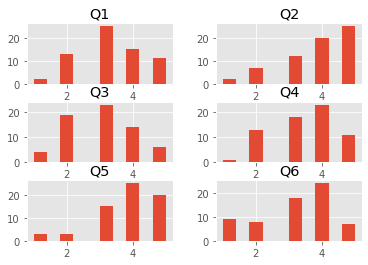

In [26]:
plt.figure(figsize=(500,500),dpi=200)
anxiety_df.hist(column=["Q1", "Q2","Q3","Q4","Q5","Q6"],bins = 10)
plt.show()

In [27]:
# computing total for Q2-Q6 columns

In [28]:
anxiety_df['Total'] = anxiety_df['Q1'] + anxiety_df['Q2'] + anxiety_df['Q3'] + anxiety_df['Q4'] + anxiety_df['Q5'] + anxiety_df['Q6']

In [29]:
anxiety_df

,Gender,Student,Age,Marital,Hours spent on social media,Q1,Q2,Q3,Q4,Q5,Q6,Date,Time,Total
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,2019-12-12,02:06:00,17
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2019-12-12,21:41:00,18
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,2019-12-12,21:42:00,21
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,2019-12-12,21:43:00,18
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,2019-12-12,21:43:00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,2019-12-31,16:11:56,24
62,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4,2019-12-31,16:12:42,18
63,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,2019-12-31,21:23:06,13
64,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4,2020-01-01,15:15:00,22


In [30]:
# Summing up the columns Q1 to Q6

In [31]:
anxiety_df.loc[:,["Q1","Q2","Q3","Q4","Q5","Q6","Total"]]

,Q1,Q2,Q3,Q4,Q5,Q6,Total
0,3,3,3,3,4,1,17
1,3,3,2,2,4,4,18
2,1,5,2,4,5,4,21
3,4,4,3,3,3,1,18
4,3,5,2,3,4,4,21
...,...,...,...,...,...,...,...
61,4,5,4,5,4,2,24
62,3,2,5,3,1,4,18
63,1,1,1,4,5,1,13
64,2,4,4,4,4,4,22


In [32]:
# computing mean and median value on "Total" column

In [33]:
anxiety_df['Total'].mean()

20.666666666666668

In [34]:
anxiety_df['Total'].median()

21.0

**PLOTTING THE NORMAL DISTRIBUTION WITH MEAN**

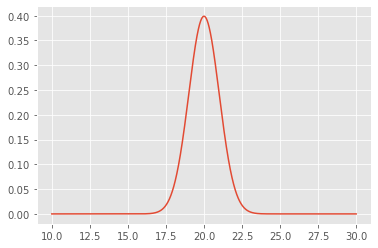

In [35]:
x = np.arange(10,30,0.001)
plt.plot(x, norm.pdf(x, 20))

**COUNTING THE NO. OF MALE AND FEMALE**

In [36]:
anxiety_df['Gender'].value_counts()

Female    39
Male      27
Name: Gender, dtype: int64

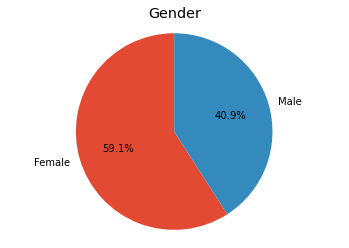

In [37]:
data = [39, 27]
label = ["Female", "Male"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

In [38]:
anxiety_df['Student'].value_counts()

Yes    42
No     24
Name: Student, dtype: int64

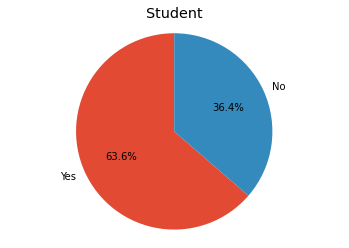

In [39]:
data = [42, 24]
label = ["Yes", "No "]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Student')
plt.axis('equal')
plt.show()

In [40]:
anxiety_df['Marital'].value_counts()

Single     47
Married    19
Name: Marital, dtype: int64

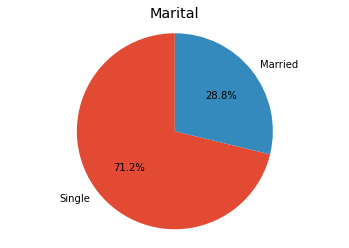

In [41]:
data = [47, 19]
label = ["Single", "Married"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Marital')
plt.axis('equal')
plt.show()

In [42]:
anxiety_df['Hours spent on social media'].value_counts()

4 hours and above per day    28
Less than 3 hours per day    12
Less than 4 hours per day     9
Less than 1 hours per day     9
Less than 2 hours per day     8
Name: Hours spent on social media, dtype: int64

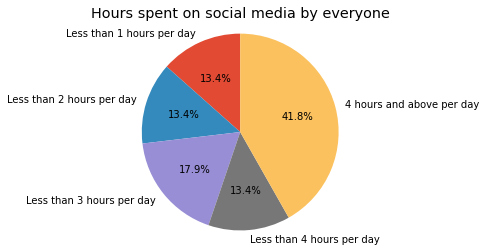

In [43]:
data = [9, 9, 12, 9, 28]
label = ["Less than 1 hours per day", "Less than 2 hours per day","Less than 3 hours per day","Less than 4 hours per day","4 hours and above per day"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Hours spent on social media by everyone')
plt.axis('equal')
plt.show()

## Analysis only on Student

In [44]:
#To show the count of student
student_df = anxiety_df[anxiety_df['Student'] == 'Yes']

In [45]:
student_df.head(5)

,Gender,Student,Age,Marital,Hours spent on social media,Q1,Q2,Q3,Q4,Q5,Q6,Date,Time,Total
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,2019-12-12,02:06:00,17
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2019-12-12,21:41:00,18
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,2019-12-12,21:42:00,21
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,2019-12-12,21:43:00,18
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,2019-12-12,21:43:00,21


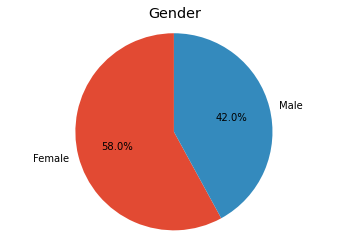

In [46]:
data = [40, 29]
label = ["Female", "Male"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

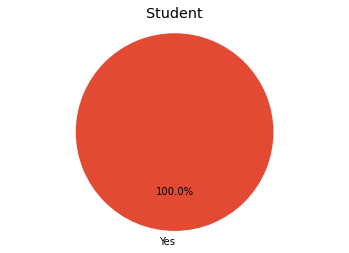

In [47]:
data = [69]
label = ["Yes"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Student')
plt.axis('equal')
plt.show()

In [48]:
marital_df = student_df[student_df['Marital']=='Single']

In [49]:
marital_df.head(5)

,Gender,Student,Age,Marital,Hours spent on social media,Q1,Q2,Q3,Q4,Q5,Q6,Date,Time,Total
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,2019-12-12,02:06:00,17
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2019-12-12,21:41:00,18
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,2019-12-12,21:42:00,21
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,2019-12-12,21:43:00,18
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,2019-12-12,21:43:00,21


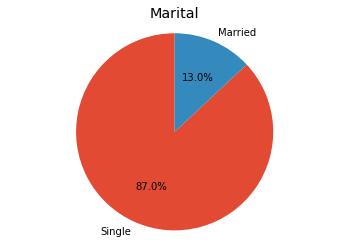

In [50]:
data = [60,9]
label = ["Single","Married"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Marital')
plt.axis('equal')
plt.show()  

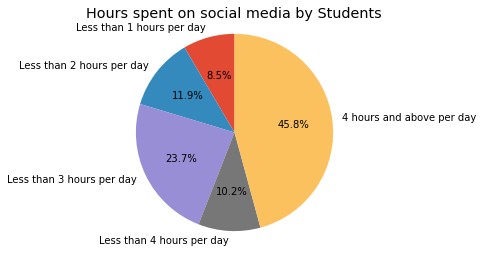

In [51]:
data = [5, 7, 14, 6, 27]
label = ["Less than 1 hours per day", "Less than 2 hours per day","Less than 3 hours per day","Less than 4 hours per day","4 hours and above per day"]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Hours spent on social media by Students')
plt.axis('equal')
plt.show()

## Age Range

<AxesSubplot:xlabel='Total', ylabel='Age'>

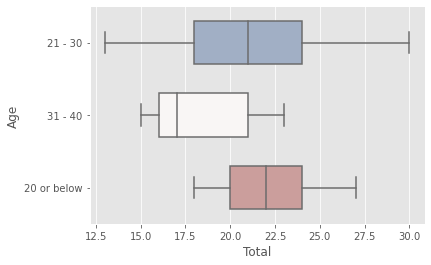

In [52]:
sns.boxplot(x="Total", y="Age", data=student_df,whis=[0, 100], width=.6, palette="vlag")

## Gender Range

<AxesSubplot:xlabel='Total', ylabel='Gender'>

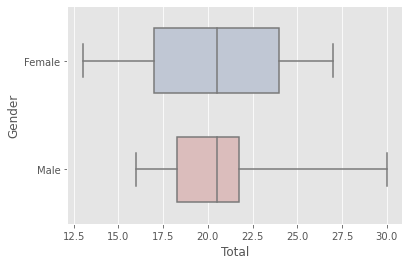

In [53]:
sns.boxplot(x="Total", y="Gender", data=student_df,whis=[0,100],width=.6, palette="vlag")

## Marital Status

<AxesSubplot:xlabel='Total', ylabel='Marital'>

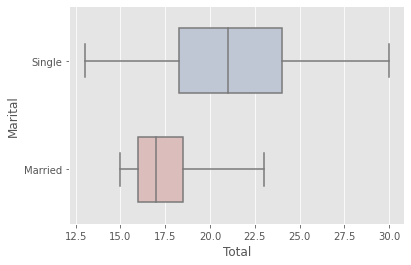

In [55]:
sns.boxplot(x="Total", y="Marital", data=student_df,whis=[0,100],width=.6, palette="vlag")